# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './documents/data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./documents/data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

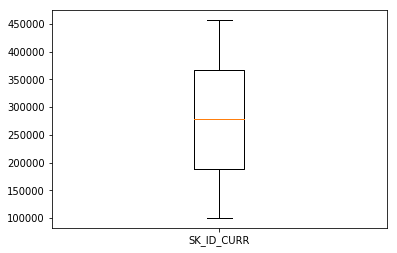

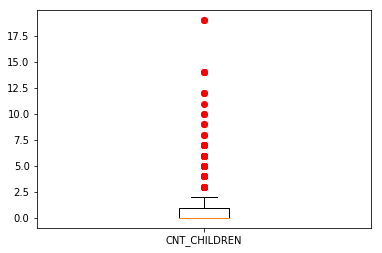

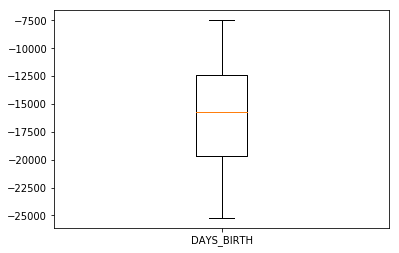

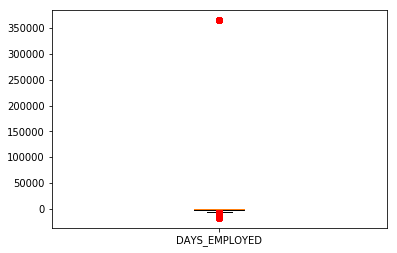

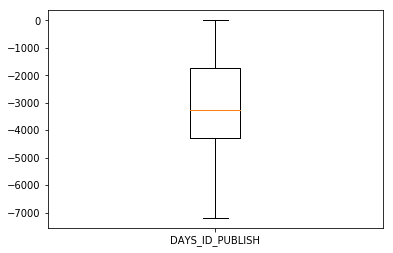

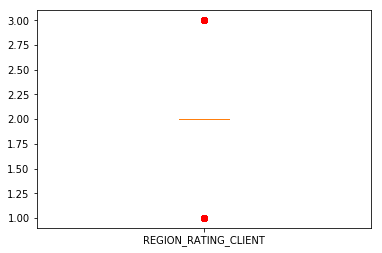

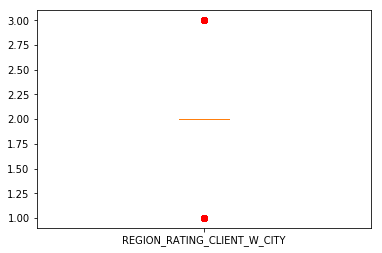

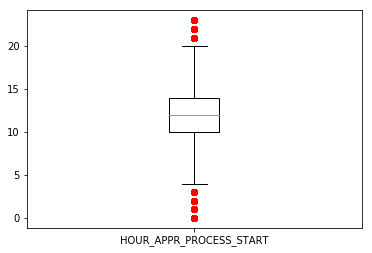

In [8]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = ['int64','float64']

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
#print("Numbers of remain columns" % len(numeric_columns))

# 檢視這些欄位的數值範圍

for col in numeric_columns:
    data = np.array(app_train[col])
    label = [col]
    plt.boxplot(data , sym ="r",labels=label)
    plt.show()



In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


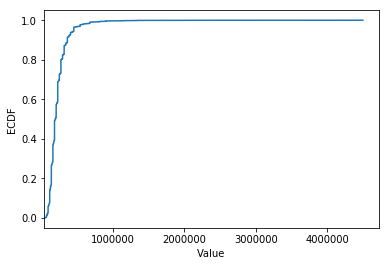

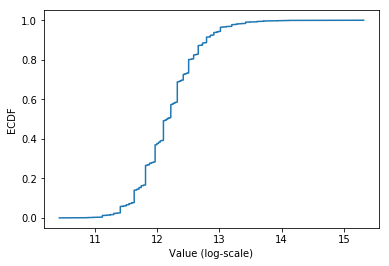

In [20]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())
app_train = app_train.dropna()

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x,y = ecdf(app_train['AMT_INCOME_TOTAL'])


#plt.plot(list(cdf.index), cdf/cdf.max())
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
#plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.xlim([x.min(), x.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
#plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.plot(np.log(x), y)
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    8602.000000
mean        0.023543
std         0.016361
min         0.000290
25%         0.010556
50%         0.020246
75%         0.030755
max         0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


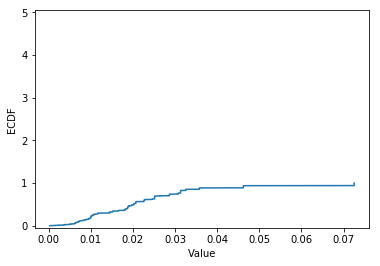

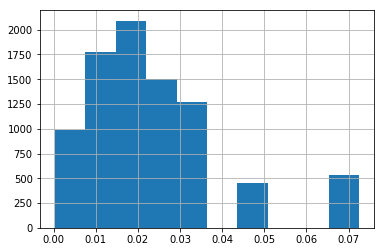

0.025164    594
0.072508    536
0.031329    527
0.046220    449
0.020713    389
0.028663    325
0.035792    287
0.020246    286
0.022625    272
0.010006    268
0.032561    236
0.018801    225
0.030755    216
0.018209    177
0.015221    176
0.019689    163
0.022800    151
0.018634    145
0.014464    142
0.016612    141
0.019101    139
0.018850    132
0.018029    118
0.010032    116
0.011657    110
0.009657    106
0.024610    103
0.010643     99
0.006305     96
0.011703     95
           ... 
0.001276     42
0.006008     42
0.006233     41
0.006852     40
0.008866     39
0.003818     38
0.006671     37
0.008575     36
0.009175     36
0.009630     33
0.005144     32
0.005313     29
0.008625     29
0.007114     27
0.005002     27
0.003541     21
0.002042     19
0.008068     19
0.002506     18
0.004960     17
0.004849     16
0.003122     13
0.005084     11
0.007120     11
0.001333     10
0.008230      5
0.001417      4
0.002134      2
0.000290      1
0.006296      1
Name: REGION_POPULATION_

In [21]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
#cdf = app_train['REGION_POPULATION_RELATIVE']
x,y = ecdf(app_train['REGION_POPULATION_RELATIVE'])


plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,5.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    8602.000000
mean        1.352360
std         2.205177
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        27.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


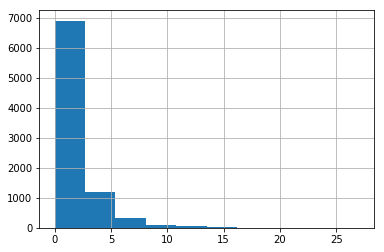

27.0       1
21.0       1
18.0       2
17.0       1
16.0       3
15.0       5
14.0       5
13.0      10
12.0      15
11.0      22
10.0      31
9.0       58
8.0       69
7.0      113
6.0      159
5.0      272
4.0      379
3.0      550
2.0      822
1.0     1488
0.0     4596
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [22]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

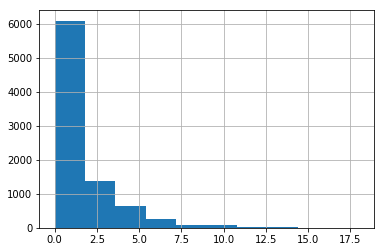

In [25]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
#app_train = app_train.dropna()
loc_a = app_train.loc[app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20]
loc_a = loc_a['OBS_60_CNT_SOCIAL_CIRCLE']
#loc_b = 

#app_train.loc[loc_a, loc_b].hist()
loc_a.hist()
plt.show()